# Decision trees

### Fuentes y recursos:
- http://scikit-learn.org/stable/modules/tree.html
- https://web.fe.up.pt/~ec/index.html

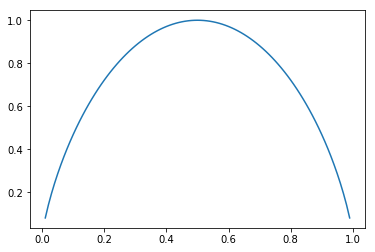

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(0.01,1.0,0.01)
p = np.vstack([p, (1-p)]).T

entropy = -np.sum(p*np.log2(p), axis=1)

plt.plot(p[:,0], entropy)
plt.show()

In [2]:
import pandas as pd

tennis_data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/tennis.csv", 
                          index_col=0)

tennis_data.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
Day,,,,,
1,Sunny,Hot,High,Light,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Light,Yes
4,Rain,Mild,High,Light,Yes
5,Rain,Cool,Normal,Light,Yes


### Let's do a simple example using the data set above

- We will start by calculating the impurity of the training set **tennis_data['Play_tennis']**

In [3]:
def calculate_entropy(p):
    return -np.sum(p*np.log2(p))

unique, counts = np.unique(tennis_data['PlayTennis'], return_counts=True)
entropy_S = calculate_entropy(counts/sum(counts))
print("Data set impurity:", entropy_S)

Data set impurity: 0.940285958671


- Now we will calculate the information gain for each attribute:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/attributes.png)

- Let's start with **Outlook**

In [4]:
def calculate_gain(unique, var='Outlook'):
    
    unique, counts = np.unique(tennis_data[var], return_counts=True)

    info_A = []

    for e in unique:
        se = np.where(tennis_data[var]==e)
        se_play = tennis_data['PlayTennis'][tennis_data.index[se[0]]]
        # print(se_play)
        u_se_play, c_se_play = np.unique(se_play, return_counts=True)
        se_entropy = abs(calculate_entropy(c_se_play/sum(c_se_play))) 
        se_size = sum(c_se_play)/len(tennis_data.index)
        # print("Entropy:", se_entropy, se_size)
        info_A += [[se_entropy, se_size]]
        
    info_A = np.array(info_A)
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    return info_g

    
info_A = calculate_gain(unique, var='Outlook')

gain = entropy_S - info_A
print("Outlook gain", gain)

Outlook gain 0.246749819774


- Now for **Humidity**

In [5]:
info_A = calculate_gain(unique, var='Humidity')

gain = entropy_S - info_A
print("Humidity gain", gain)

Humidity gain 0.151835501362


- **Wind**

In [6]:
info_A = calculate_gain(unique, var='Wind')

gain = entropy_S - info_A
print("Wind gain", gain)

Wind gain 0.0481270304083


- **Temperature**

In [7]:
info_A = calculate_gain(unique, var='Temperature')

gain = entropy_S - info_A
print("Temperature gain", gain)

Temperature gain 0.029222565659


- The best attribute, the one that better (purest) split the dataset is Outlook
 - Now you have to repeat the process iteratively for each of the partition subsets
 - Try it for yourself

 
- The final tree is shown below:

![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/dtree_tennis.png)

# Build the tree with sklearn

In [8]:
from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()

# Decision trees in python can't use factor data
# We will encode the data as numeric using LabelEncoder
le = preprocessing.LabelEncoder()

var = ["Outlook", "Temperature", "Humidity", "Wind", "PlayTennis"]

for v in var:
    le.fit(tennis_data[v])
    data[v] = le.transform(tennis_data[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

# Fit model to data
clf = clf.fit(t_data, t_target)

# Visualize tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["Don't Play", "Play"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### We are going to encode by hand to better understand the model

In [9]:
data = tennis_data.copy()

data["Outlook"] = np.where(data["Outlook"]=="Sunny", 2, 
                          np.where(data["Outlook"]=="Overcast", 0, 1))

data["Temperature"] = np.where(data["Temperature"]=="Hot", 2, 
                               np.where(data["Temperature"]=="Mild", 1, 0))

data["Humidity"] = np.where(data["Humidity"]=="Normal", 0, 1)

data["Wind"] = np.where(data["Wind"]=="Light", 0, 1)
    
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["Don't Play", "Play"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### We will repeat but this time for a different depth

In [10]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]

clf = clf.fit(t_data, t_target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(t_data.columns.values),  
                         class_names=["Don't Play", "Play"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

# Example using the Iris dataset

In [11]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

md = 3  # tree max depth
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md)
clf = clf.fit(iris.data, iris.target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

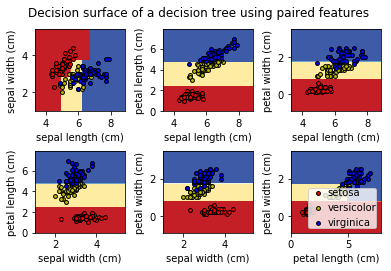

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=md).fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

In [13]:
print(clf.predict(X))
clf.predict_proba(X)[range(1,len(X),5)]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.97916667,  0.02083333],
       [ 0.        ,  0.        ,  1.   

In [14]:
import sklearn
import plotly
#plotly.tools.set_credentials_file(username='', api_key='')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()


def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

cmap = matplotlib_to_plotly(plt.cm.Paired, 5)

fig = tools.make_subplots(rows=2, cols=3)

xlabel = []
ylabel = []

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_ = np.arange(x_min, x_max, plot_step)
    y_ = np.arange(y_min, y_max, plot_step)
    xx, yy = np.meshgrid(x_, y_)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    xlabel.append(iris.feature_names[pair[0]])
    ylabel.append(iris.feature_names[pair[1]])
    cs = go.Heatmap(x=x_, y=y_, z=Z, 
                    colorscale=cmap,
                    showscale=False)

    fig.append_trace(cs, int(pairidx/3)+1, pairidx%3+1)
    
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        p1 = go.Scatter(x=X[idx, 0][0], y=X[idx, 1][0], 
                        mode='markers',
                        marker=dict(color=color,
                                    colorscale=cmap,
                                    showscale=False,
                                    line=dict(color='black', width=1)),
                        showlegend=False)
        fig.append_trace(p1, int(pairidx/3)+1, pairidx%3+1)
j = 0
for i in map(str,range(1, 7)):
        y = 'yaxis' + i
        x = 'xaxis' + i
        fig['layout'][y].update(showticklabels=False, ticks='',
                                title=ylabel[j])
        
        fig['layout'][x].update(showticklabels=False, ticks='',
                                title=xlabel[j])
        j+=1
        
fig['layout'].update(height=700, hovermode='closest',
                     title="Decision surface of a decision tree using paired features")

py.iplot(fig)

ModuleNotFoundError: No module named 'plotly'